In [1]:
import pandas as pd
from hmmlearn.hmm import GaussianHMM

In [2]:
data = pd.read_csv("03-05-21:52.csv", delimiter=";")
bananas = data.groupby("product").get_group("BANANAS").reset_index().drop(columns=["product", "index"])
pearls = data.groupby("product").get_group("PEARLS").reset_index().drop(columns=["product", "index"])
bn_features = bananas[['bid_price_1', 'bid_volume_1', 'ask_price_1', 'ask_volume_1', 'mid_price']]

In [3]:
hmm = GaussianHMM(5, covariance_type='full')
hmm.fit(bn_features)

/home/andrew/Projects/prosperity/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


GaussianHMM(covariance_type='full', n_components=5)

In [5]:
prob, seq = hmm.decode(bn_features)

<Axes: xlabel='bid_price_1', ylabel='ask_price_1'>

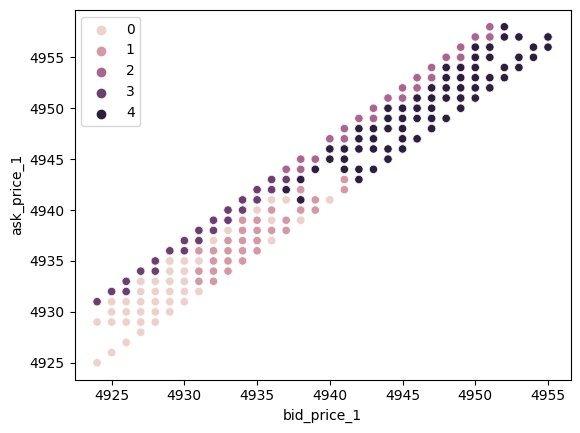

In [8]:
import seaborn as sns

sns.scatterplot(data=bn_features, x='bid_price_1', y='ask_price_1', hue=seq)